In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

<h1>Q 1.1</h1>

In [326]:
# Create TC matrix

n = 240
AV = np.array([0,20,0,0,0,0])
IV = np.array([30,45,60,40,40,40])
DO = np.array([15,20,25,15,20,25])

TC = np.array([([0] * AV[i] + (([1] * DO[i] + [0] * (IV[i] - DO[i])) * int(n/IV[i])))[0:240] for i in range(6)], \
              dtype = 'object')

# Standardize

for i in range(6):
    TC[i] = (TC[i] - np.mean(TC[i]))/np.std(TC[i])

TC = TC.astype(float)

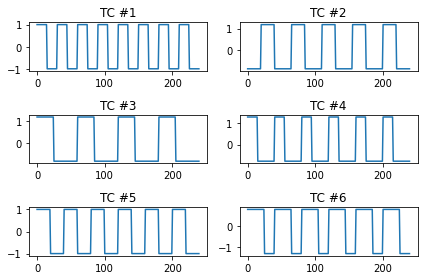

In [327]:
# Plot each TC.

fig, axis = plt.subplots(3, 2)

for i in range(6):
    axis[int(i/2), i%2].plot(range(240), TC[i])
    axis[int(i/2), i%2].set_title("TC #" + str(i + 1))
    
fig.tight_layout()
plt.show()

<h1>Q 1.2</h1>

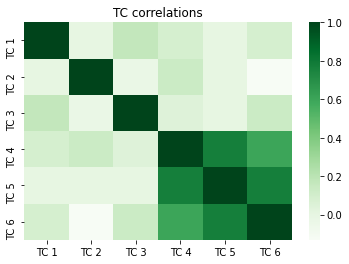

In [328]:
# Visualise correlations.

labels = ["TC " + str(i) for i in range(1, 7)]

corr = np.corrcoef(TC)
fig = sns.heatmap(corr, cmap = 'Greens', xticklabels = labels, yticklabels = labels)
fig.set_title("TC correlations")
plt.show()

<h1>Q 1.3</h1>

In [329]:
# Construct tmpSM.

tmp1 = np.zeros((21, 21))
tmp1[1:6, 1:6] = 1

tmp2 = np.zeros((21, 21))
tmp2[1:6, 14:19] = 1

tmp3 = np.zeros((21, 21))
tmp3[7:13, 1:6] = 1

tmp4 = np.zeros((21, 21))
tmp4[7:13, 14:19] = 1

tmp5 = np.zeros((21, 21))
tmp5[14:19, 1:6] =1

tmp6 = np.zeros((21, 21))
tmp6[14:19, 14:19] = 1

tmpSM = np.array([tmp1, tmp2, tmp3, tmp4, tmp5, tmp6])

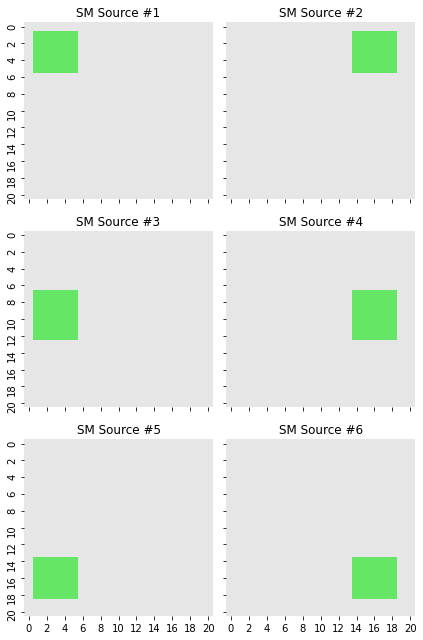

In [330]:
# Plot tmpSM sources.

colors = ((0.9, 0.9, 0.9), (0.4, 0.9, 0.4))
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
fig, axis = plt.subplots(3, 2, sharex = "col", sharey = "row", figsize = (6, 9))

for i in range(6):    
    sns.heatmap(tmpSM[i], cmap = cmap, ax = axis[int(i/2)][i%2], cbar = False)
    axis[int(i/2), i%2].set_title("SM Source #" + str(i + 1))
    

fig.tight_layout()
plt.show()

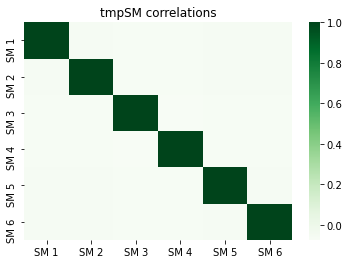

In [331]:
# Plot tmpSMs correlations.

SM = tmpSM.swapaxes(1, 2).reshape(6, 441)

corr = np.corrcoef(SM)
labels = ["SM " + str(i) for i in range(1, 7)]
fig = sns.heatmap(corr, cmap = 'Greens', xticklabels = labels, yticklabels = labels)
fig.set_title("tmpSM correlations")
plt.show()

<h1>Q 1.4</h1>

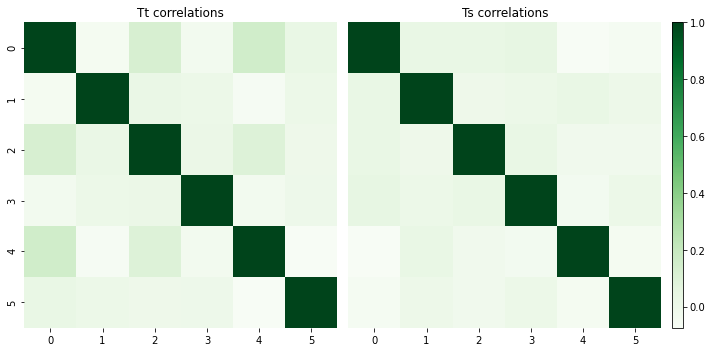

In [332]:
# Construct Tt and Ts
np.random.seed(1)
Tt = np.random.normal(scale = np.sqrt(0.25), size = (240, 6))
Ts = np.random.normal(scale = np.sqrt(0.015), size = (6, 441))

# Plot correlations

Ttcorr = np.corrcoef(Tt.T)
Tscorr = np.corrcoef(Ts)

fig, axis = plt.subplots(1, 3, figsize = (10, 5), gridspec_kw=dict(width_ratios=[1.5,1.5,0.05]))
sns.heatmap(Ttcorr, cmap = "Greens", ax = axis[0], cbar = False)
axis[0].set_title("Tt correlations")
sns.heatmap(Tscorr, cmap = "Greens", ax = axis[1], cbar = False, yticklabels = False)
axis[1].set_title("Ts correlations")
fig.colorbar(axis[1].collections[0], cax=axis[2])
fig.tight_layout()

In [333]:
Ttcorr

array([[ 1.        , -0.0644699 ,  0.11114282, -0.0511021 ,  0.13951099,
         0.0154323 ],
       [-0.0644699 ,  1.        ,  0.00789166, -0.00562271, -0.07549779,
        -0.00598569],
       [ 0.11114282,  0.00789166,  1.        ,  0.00141058,  0.07992515,
        -0.02140415],
       [-0.0511021 , -0.00562271,  0.00141058,  1.        , -0.05260557,
        -0.01606176],
       [ 0.13951099, -0.07549779,  0.07992515, -0.05260557,  1.        ,
        -0.09161659],
       [ 0.0154323 , -0.00598569, -0.02140415, -0.01606176, -0.09161659,
         1.        ]])

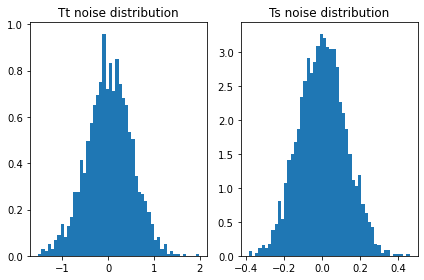

In [334]:
# Plot distributions of Tt and Ts

fig, axis = plt.subplots(1, 2)
axis[0].hist(Tt.flatten(), bins = 50, density = True, stacked = True)
axis[0].set_title("Tt noise distribution")
axis[1].hist(Ts.flatten(), bins = 50, density = True, stacked = True)
axis[1].set_title("Ts noise distribution")
fig.tight_layout()
fig.show()

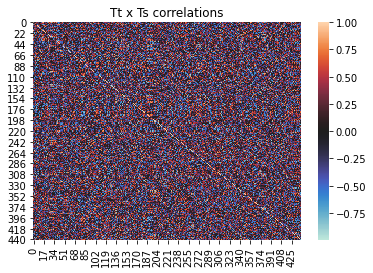

In [335]:
# Correlation of Tt x Ts

TtTs = Tt @ Ts
TtTs.shape

TtTscorr = np.corrcoef(TtTs.T)
sns.heatmap(TtTscorr, cmap = "icefire")
plt.title("Tt x Ts correlations")
plt.show()

<h1>Q 1.5</h1>

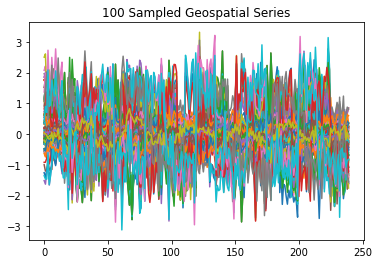

In [336]:
# Generate X = (TC + Tt) * (SM + Ts)

X = np.add(TC.T, Tt) @ np.add(SM, Ts) 

# Take sample subset
np.random.seed(1)
samples = np.random.randint(441, size=100)
Xsample = X[:, samples]

# Plot the sampled series
plt.plot(Xsample)
plt.title("100 Sampled Geospatial Series")
plt.show()

In [337]:
X.shape

(240, 441)

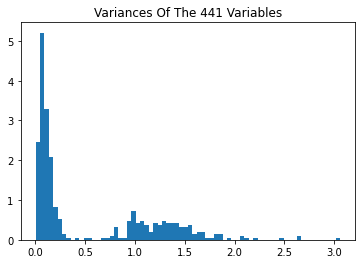

In [338]:
# Plot variance of samples

Vars = np.var(X, axis = 0)
plt.hist(Vars, bins = 70, density = True, stacked = True)
plt.title("Variances Of The 441 Variables")
plt.show()

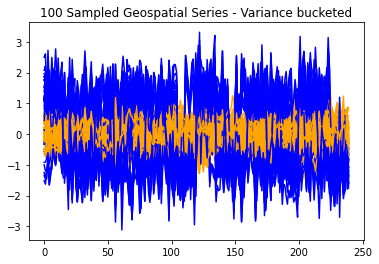

In [339]:
# Re-visualize the sample series with colour-coded variances.

for i in range(100):
    plt.plot(Xsample.T[i], color = "blue" if Vars[samples][i] > 0.5 else "orange")

plt.title("100 Sampled Geospatial Series - Variance bucketed")
plt.show()

In [340]:
X.shape

(240, 441)

In [341]:
# Standardize X

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

<h1>Q 2.1</h1>
Estimate LSR of $A_{LSR} = (D^TD)^{-1}D^TX$, where $D = TC$

Also estimate LSR of $D_{LSR} = XA_{LSR}^T$

In [342]:
TC = TC.T

In [343]:
# Create LSR estimates.

Alsr = np.abs(np.linalg.inv(TC.T @ TC) @ TC.T @ X)
Dlsr = X @ Alsr.T
Alsr = Alsr.reshape(6, 21, 21).swapaxes(1,2)

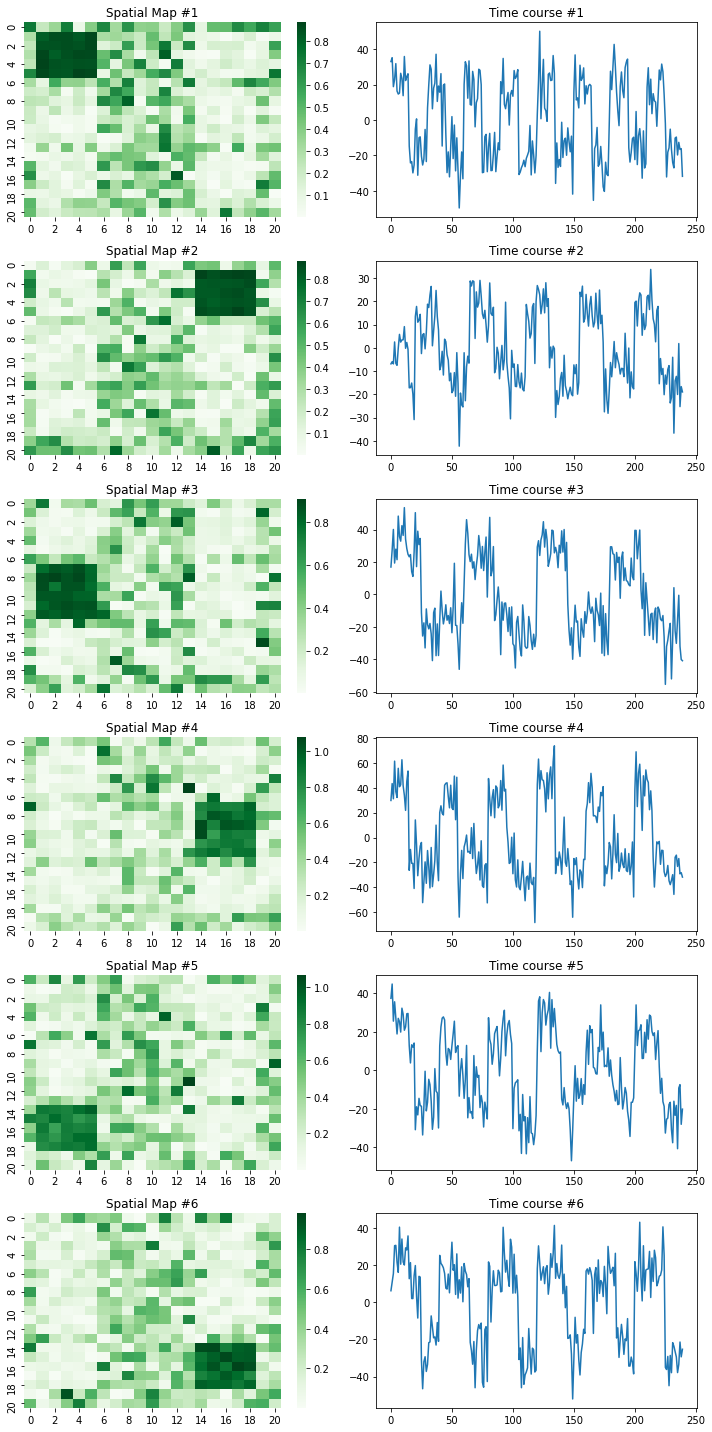

In [344]:
# Plot spatial estimates with corresponding time estimates.

fig, axis = plt.subplots(6, 2, figsize = (10, 20))

for i in range(6):    
    sns.heatmap(Alsr[i], cmap = "Greens", ax = axis[i][0])
    axis[i, 0].set_title("Spatial Map #" + str(i + 1))
    axis[i][1].plot(Dlsr[:, i])
    axis[i][1].set_title("Time course #" + str(i + 1))

fig.tight_layout()

In [345]:
X.shape

(240, 441)

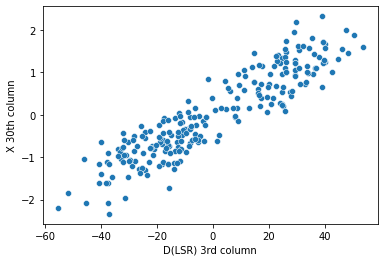

In [346]:
# Compare a pair of location data between real and estimate.

fig = sns.scatterplot(x = Dlsr.T[2], y = X.T[29])
fig.set_xlabel("D(LSR) 3rd column")
fig.set_ylabel("X 30th column")
plt.show()

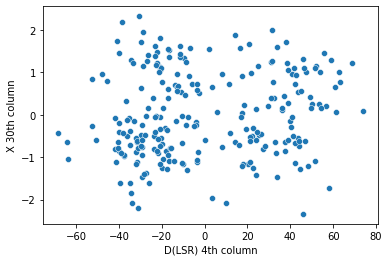

In [347]:
# Compare a pair of location data between real and estimate.

fig = sns.scatterplot(x = Dlsr[:, 3], y = X[:, 29])
fig.set_xlabel("D(LSR) 4th column")
fig.set_ylabel("X 30th column")
plt.show()

<AxesSubplot:>

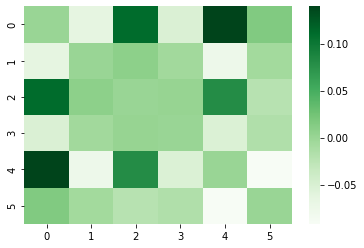

In [348]:
Ttcorr = np.corrcoef(Tt.T)
sns.heatmap(Ttcorr - np.eye(6), cmap = "Greens")

In [349]:
# Optimize lambda

def f(lmbda):
    Arr = np.linalg.inv((TC.T @ TC) + (lmbda*441)*(np.eye(TC.shape[1]))) @ TC.T @ X
    Drr = X @ Arr.T
    MSE = np.sum(np.sum(np.square(X - (Drr @ Arr))))/(n*441)
    return MSE

stats = minimize(f, 0.5, method = "TNC")
print(stats)
lambdabest = stats.x[0] * 441
print(f"\nBest lambda hat: {lambdabest} \t MSE: {stats.fun}")

     fun: 0.4006135585287004
     jac: array([9.43689577e-08])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 64
     nit: 7
  status: 1
 success: True
       x: array([6.8729721])

Best lambda hat: 3030.980695341259 	 MSE: 0.4006135585287004


In [350]:
# Test lambda = 1000

print(f"Lambda: 1000 \t MSE: {f(1000)}")

Lambda: 1000 	 MSE: 0.9999225450060024


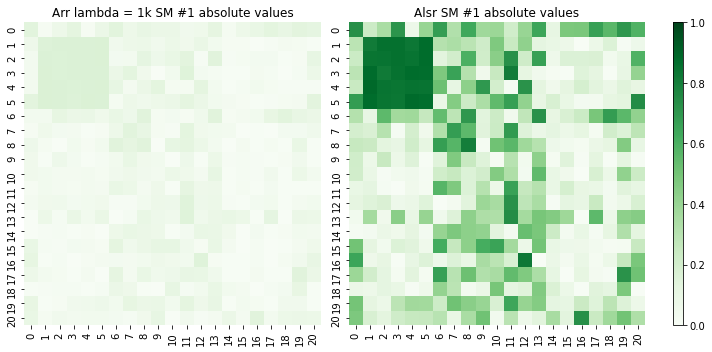

In [351]:
# Compare values of LSR vs RR

Arr1k = (np.abs(np.linalg.inv(TC.T @ TC + (1000)*(np.eye(TC.shape[1]))) @ TC.T @ X).reshape(6, 21, 21)).swapaxes(1,2)


fig, axis = plt.subplots(1, 3, figsize = (10, 5), gridspec_kw=dict(width_ratios=[1.5,1.5,0.05]))
sns.heatmap(np.abs(Arr1k[0]), cmap = "Greens", vmin = 0, vmax = 1, cbar = False, ax = axis[0])
axis[0].set_title("Arr lambda = 1k SM #1 absolute values")
sns.heatmap(np.abs(Alsr[0]), cmap = "Greens", vmin = 0, vmax = 1, cbar = False, ax = axis[1])
axis[1].set_title("Alsr SM #1 absolute values")
fig.colorbar(axis[1].collections[0], cax=axis[2])
fig.tight_layout()
plt.show()

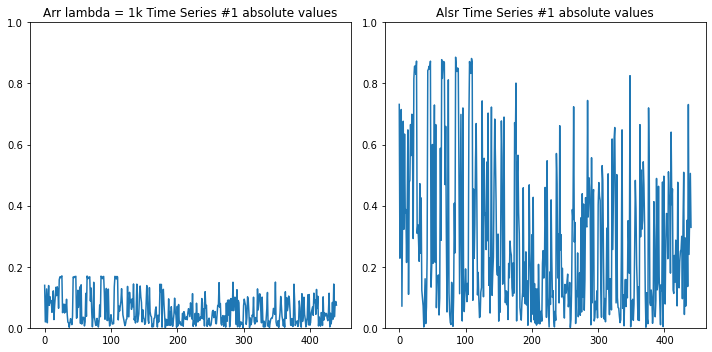

In [352]:
# Line plot alternative

fig, axis = plt.subplots(1, 2, figsize = (10, 5))
axis[0].plot(range(len(Arr1k[0].flatten())), np.abs(Arr1k[0].flatten()))
axis[0].set_ylim([0, 1])
axis[0].set_title("Arr lambda = 1k Time Series #1 absolute values")
axis[1].plot(range(len(Alsr[0].flatten())), np.abs(Alsr[0].flatten()))
axis[1].set_ylim([0, 1])
axis[1].set_title("Alsr Time Series #1 absolute values")
fig.tight_layout()
plt.show()

In [353]:
# Check corrcoef sums

Arr = np.linalg.inv(TC.T @ TC + (0.5*441)*(np.eye(TC.shape[1]))) @ TC.T @ X
Drr = X @ Arr.T

Ctlsr = []
Ctrr = []

for i in range(6):
    Ctlsr.append(np.corrcoef(TC.T[i], Dlsr.T[i])[0][1])
    Ctrr.append(np.corrcoef(TC.T[i], Drr.T[i])[0][1])
print(f"Ctlsr coefficient sum: {sum(Ctlsr)}")
print(f"Ctrr coefficient sum: {sum(Ctrr)}")

Ctlsr coefficient sum: 5.196927555383435
Ctrr coefficient sum: 5.4198701511924465


In [354]:
assert(TC.shape == (240, 6))

In [373]:
rhos = np.arange(0,1.05,0.05)

# Lasso Regression
def lasso(TCs, X, rho):
    nsrcs = 6
    step = 1/((np.linalg.norm(TCs @ TCs.T))*1.1)
    thr = rho * n * step
    Ao = np.zeros((nsrcs,1))
    A = np.zeros((nsrcs,1))
    Alr = np.zeros((nsrcs,21*21))

    for k in range(21*21):
        A = Ao + step * (TCs.T @ (X[:,k].reshape(240,1) - (TCs @ Ao)))
        A = (1/(1+thr)) * (np.sign(A) * np.max([np.zeros(nsrcs), (np.abs(A) - thr).T[0]], axis = 0).reshape(6,1))
        for i in range(10):
            Ao = A
            A = Ao + step * (TCs.T @ (X[:,k].reshape(240,1) - (TCs @ Ao)))
            A = (1/(1+thr)) * (np.sign(A) * np.max([np.zeros(nsrcs), (np.abs(A) - thr).T[0]], axis = 0).reshape(6,1))
        Alr[:,k] = A.reshape(1,6)[0]
    
    return Alr

def MSE(X, D, A):
    return np.sum(np.sum(np.square(X - (D @ A))))/(n*441)

MSEs = np.zeros((10, 21))

# Iterate over seed and rho combinations for 10 realisations using each rho.
for i in range(10):
    for j, rho in enumerate(rhos):
        np.random.seed(i)
        Gt = np.random.normal(scale = np.sqrt(0.25), size = (240, 6))
        Gs = np.random.normal(scale = np.sqrt(0.015), size = (6, 441))
                
        Xlas = np.add(TC, Gt) @ np.add(SM, Gs)
        Xlas = (Xlas - np.mean(Xlas, axis=0)) / np.std(Xlas, axis=0)

        Alas = lasso(TC, Xlas, rho)
        Dlas = Xlas @ Alas.T
        
        MSEs[i, j] = MSE(Xlas, Dlas, Alas)

avgMSEs = np.mean(MSEs, axis = 0)

In [374]:
avgMSEs

array([2.91335580e+03, 1.66303480e+03, 9.50975552e+02, 5.35994893e+02,
       2.95482704e+02, 1.57947272e+02, 8.08727855e+01, 3.91194360e+01,
       1.75098304e+01, 7.04947945e+00, 2.49260528e+00, 8.41114993e-01,
       4.67004638e-01, 5.55599979e-01, 7.39185713e-01, 8.84567038e-01,
       9.66279422e-01, 9.96420934e-01, 9.99992163e-01, 1.00000000e+00,
       1.00000000e+00])

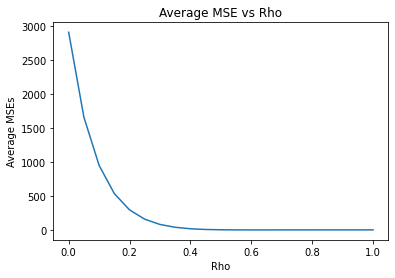

In [378]:
# Plot average MSEs vs rho

plt.plot(rhos, avgMSEs)
plt.xlabel("Rho")
plt.ylabel("Average MSEs")
plt.title("Average MSE vs Rho from 10 realisations of X")
plt.show()